In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [138]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [140]:
df.drop(['ID','Year_Birth','Dt_Customer'],inplace=True,axis=1)

In [141]:
df['Kidhome']=df['Kidhome'].astype(object)

In [142]:
df['Teenhome']=df['Teenhome'].astype(object)
df['AcceptedCmp3']=df['AcceptedCmp3'].astype(object)
df['AcceptedCmp4']=df['AcceptedCmp4'].astype(object)
df['AcceptedCmp5']=df['AcceptedCmp5'].astype(object)
df['AcceptedCmp1']=df['AcceptedCmp1'].astype(object)
df['AcceptedCmp2']=df['AcceptedCmp2'].astype(object)
df['Complain']=df['Complain'].astype(object)
df['Z_CostContact']=df['Z_CostContact'].astype(object)
df['Z_Revenue']=df['Z_Revenue'].astype(object)
df['Response']=df['Response'].astype(object)

In [143]:
pd.get_dummies(df,drop_first=True,dtype=float).columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Kidhome_1', 'Kidhome_2', 'Teenhome_1',
       'Teenhome_2', 'AcceptedCmp3_1', 'AcceptedCmp4_1', 'AcceptedCmp5_1',
       'AcceptedCmp1_1', 'AcceptedCmp2_1', 'Complain_1', 'Response_1'],
      dtype='object')

In [144]:
df=pd.get_dummies(df,drop_first=True,dtype=float)

In [145]:
df.dropna(inplace=True)

In [146]:
from sklearn.preprocessing import StandardScaler
x=df.drop('Response_1',axis=1)
y=df['Response_1']

In [147]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [148]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2,AcceptedCmp3_1,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_1,AcceptedCmp2_1,Complain_1
0,0.234063,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,...,-0.816957,-0.145596,-0.921819,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
1,-0.234559,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,...,1.224054,-0.145596,1.084812,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
2,0.769478,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,...,-0.816957,-0.145596,-0.921819,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
3,-1.017239,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,...,1.224054,-0.145596,-0.921819,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
4,0.240221,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,...,1.224054,-0.145596,-0.921819,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.356642,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,...,-0.816957,-0.145596,1.084812,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812
2212,0.467539,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,...,-0.816957,6.868327,1.084812,-0.153482,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812
2213,0.188091,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,...,-0.816957,-0.145596,-0.921819,-0.153482,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812
2214,0.675388,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,...,-0.816957,-0.145596,1.084812,-0.153482,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812


In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_rg=LogisticRegression()

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.7,random_state=42)

In [152]:
log_rg.fit(x_train,y_train)

LogisticRegression()

In [153]:
y_pred=log_rg.predict(x_test)

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn .metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [155]:
confusion_matrix(y_test,y_pred)

array([[544,  25],
       [ 51,  45]], dtype=int64)

In [156]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.712


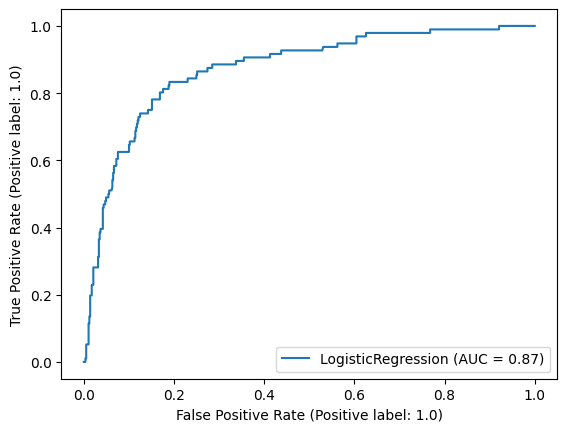

In [157]:
svc_disp = RocCurveDisplay.from_estimator(log_rg, x_test, y_test)
plt.show()

In [158]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 6, step = 1)
rfe_selector.fit(x_scaled, y)
x_scaled.columns[rfe_selector.get_support()]

Index(['Recency', 'MntMeatProducts', 'NumWebVisitsMonth',
       'Marital_Status_Married', 'Marital_Status_Together', 'AcceptedCmp5_1'],
      dtype='object')

In [159]:
x_scaled_red=x_scaled.loc[:,['Recency', 'MntMeatProducts', 'NumWebVisitsMonth','Marital_Status_Married', 'Marital_Status_Together', 'AcceptedCmp5_1']]

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_red,y,train_size=0.7,random_state=42)
log_rg.fit(x_train,y_train)
y_pred=log_rg.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[556,  13],
       [ 75,  21]], dtype=int64)

In [161]:
from sklearn .metrics import roc_auc_score

In [162]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.598


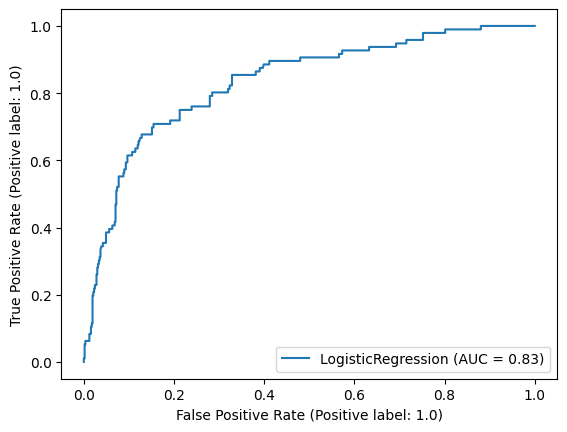

In [163]:
svc_disp = RocCurveDisplay.from_estimator(log_rg, x_test, y_test)
plt.show()